In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df6 = pd.read_csv("LPOINT_BIG_COMP_06_LPAY.csv", sep = ',')
df6

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500
...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800
353180,M470112503,210104210652271,A06,2,20210104,21,6440
353181,M748878049,210119200278240,A02,1,20210119,20,17600
353182,M748878049,210119180267206,A02,1,20210119,18,12400


In [3]:
df6.isnull().sum()

cust       0
rct_no     0
cop_c      0
chnl_dv    0
de_dt      0
de_hr      0
buy_am     0
dtype: int64

In [4]:
df6.groupby(df6['cust']).size()

cust
M000136117     4
M000419293    42
M000494848    94
M000557840    38
M000871427     5
              ..
M999227380     2
M999268192    30
M999599111    77
M999770689    79
M999962961    16
Length: 8906, dtype: int64

In [5]:
cust_df = pd.DataFrame(df6.groupby(df6['cust']).sum())
print('고객 별 총 이용 금액 (오름차순)\n', cust_df['buy_am'].sort_values(), '\n')

고객 별 총 이용 금액 (오름차순)
 cust
M929422819          100
M620106281          100
M799857188          100
M109052062          100
M672691149          100
                ...    
M268374518     90482590
M384121563    124813061
M561426592    134235520
M890280911    175271698
M619205727    710117779
Name: buy_am, Length: 8906, dtype: int64 



In [6]:
print('이용시간')
df6.groupby(df6['de_hr']).size().sort_values()

이용시간


de_hr
4       795
5       989
3      1132
6      1950
2      2120
1      4373
7      6285
0      8634
8      9197
9     11793
23    12550
22    15916
10    16587
21    18442
20    21021
14    22589
15    22874
11    23311
16    24031
19    24389
13    24449
17    25155
18    27055
12    27547
dtype: int64

In [7]:
df6.groupby(df6['cop_c']).size().sort_values()

cop_c
E01      472
B01      769
C02     1809
A05     2604
D02     4250
C01    11321
D01    13101
A03    16477
L00    22526
A04    29243
A02    31778
A01    54026
L01    70939
A06    93869
dtype: int64

In [8]:
df6.groupby('chnl_dv')['cust'].count()

chnl_dv
1    150010
2    203174
Name: cust, dtype: int64

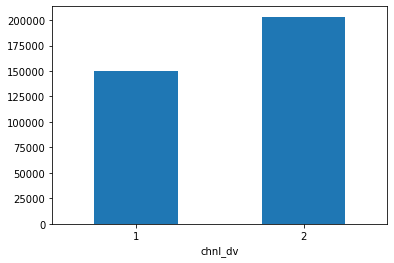

In [18]:
df6.groupby('chnl_dv')['cust'].count().plot.bar(rot=0)
plt.show()

In [10]:
df1 = pd.read_csv('LPOINT_BIG_COMP_01_DEMO.csv', sep=',')

In [11]:
df16 = pd.merge(df1, df6, on='cust', how='inner')
df16

,cust,ma_fem_dv,ages,zon_hlv,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100
1,M000136117,여성,30대,Z11,211120000687692,A06,2,20211120,0,177301
2,M000136117,여성,30대,Z11,210104110684235,A06,2,20210104,11,42600
3,M000136117,여성,30대,Z11,210109140124587,A01,1,20210109,14,902500
4,M000419293,여성,40대,Z17,211103140120216,D01,2,20211103,14,9900
...,...,...,...,...,...,...,...,...,...,...
353179,M999962961,여성,50대,Z17,210724200025828,L00,2,20210724,20,9156
353180,M999962961,여성,50대,Z17,210214170187495,A01,1,20210214,17,5500
353181,M999962961,여성,50대,Z17,210214180290789,C02,1,20210214,18,12700
353182,M999962961,여성,50대,Z17,210113180665862,A06,2,20210113,18,86380


In [12]:
df16_ages = pd.DataFrame(df16.groupby('ages')['cust'].count())
df16_ages

,cust
ages,
20대,26491
30대,99874
40대,163346
50대,55622
60대,7232
70대,619


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


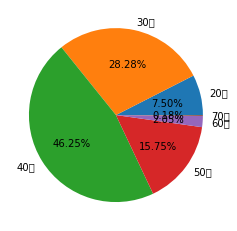

In [13]:
plt.pie(df16_ages['cust'], labels=df16_ages.index, autopct='%1.2f%%')
plt.show()

In [14]:
df16.groupby('ma_fem_dv')['cust'].count()

ma_fem_dv
남성    110250
여성    242934
Name: cust, dtype: int64

In [15]:
df6_cop = pd.DataFrame(df6.groupby(df6['cop_c']).size())
df6_cop

,0
cop_c,
A01,54026
A02,31778
A03,16477
A04,29243
A05,2604
A06,93869
B01,769
C01,11321
C02,1809


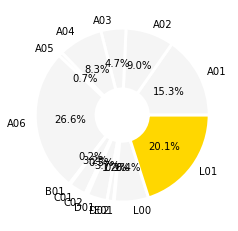

In [16]:
wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
colors = ['whitesmoke', 'whitesmoke', 'whitesmoke','whitesmoke','whitesmoke','whitesmoke','whitesmoke','whitesmoke','whitesmoke','whitesmoke','whitesmoke','whitesmoke', 'whitesmoke','gold']
plt.pie(df6_cop[0], labels=df6_cop.index, autopct='%1.1f%%', wedgeprops=wedgeprops, colors=colors)
plt.show()

In [17]:
df6[df6['cop_c']=='L01'].groupby('chnl_dv')['cust'].count()

chnl_dv
1     1182
2    69757
Name: cust, dtype: int64